<a href="https://colab.research.google.com/github/anjanay-anjanay/DLNLP/blob/main/035008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


# 1.0.1
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

In [19]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [21]:
# 2.1 Where is our data file:
pathToFolder = "/content/sample_data"

In [22]:
# 2.2 Full file path:
path = Path(pathToFolder) / "california_housing_train.csv"

In [23]:
# 3.0 Read data
cal_house = pd.read_csv(path)
cal_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [24]:
cal_house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [25]:
# 3.1
cal_house.shape   # (1599, 12)
cal_house.dtypes

(17000, 9)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [26]:
cal_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
# 3.0 Check NULL
cal_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
# 3.2 Get target and predictors:
y = cal_house.pop("median_house_value")
X = cal_house #Convention: predictor in Capital X

In [29]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [30]:
# 3.0

features_num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']


In [31]:
# 3.1 Set process pipeline:

preprocessor = make_column_transformer(
                                        (StandardScaler(), features_num)
                                        )

In [32]:
ss = StandardScaler()

In [34]:
ss.fit(cal_house[features_num])

StandardScaler()

In [35]:
data = ss.transform(X.loc[:,features_num])

In [36]:
data.shape

(17000, 8)

In [37]:
# 4.1 Split data:
from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size = 0.25)

In [38]:
y.shape

(17000,)

In [46]:
# 6.0
model = tf.keras.Sequential()

In [47]:
model.add(tf.keras.layers.Input(shape=(8,)))

In [48]:
model.add(tf.keras.layers.Dense(25, activation = 'relu')) #Hidden Layer

In [49]:
model.add(tf.keras.layers.Dense(50, activation = 'relu')) #Hidden Layer

In [50]:
model.add(tf.keras.layers.Dense(100, activation = 'relu')) #Hidden Layer

In [51]:
#4.3 Compile
model.compile( loss = "mae")
#mean absolute error

In [52]:
# 4.4 Train
model.fit(X,y, epochs = 128 )

Epoch 1/128
532/532 [==============================] - 1s 1ms/step - loss: 167250.3281
Epoch 2/128
532/532 [==============================] - 1s 1ms/step - loss: 146137.3750
Epoch 3/128
532/532 [==============================] - 1s 1ms/step - loss: 143489.0312
Epoch 4/128
532/532 [==============================] - 1s 1ms/step - loss: 138955.0938
Epoch 5/128
532/532 [==============================] - 1s 1ms/step - loss: 131370.6719
Epoch 6/128
532/532 [==============================] - 1s 1ms/step - loss: 124874.7656
Epoch 7/128
532/532 [==============================] - 1s 1ms/step - loss: 123177.6953
Epoch 8/128
532/532 [==============================] - 1s 1ms/step - loss: 122739.7812
Epoch 9/128
532/532 [==============================] - 1s 1ms/step - loss: 121546.7344
Epoch 10/128
532/532 [==============================] - 1s 1ms/step - loss: 120698.7266
Epoch 11/128
532/532 [==============================] - 1s 2ms/step - loss: 120287.8438
Epoch 12/128
532/532 [===================

In [53]:
from tensorflow.keras.utils import plot_model

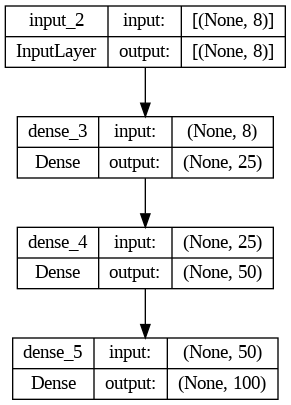

In [54]:
plot_model(model,show_shapes=True)

In [55]:
# 5.0 Predict
pred = model.predict(X)

532/532 [==============================] - 1s 1ms/step


In [56]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [57]:
# 5.1.1
y.shape

(17000,)

In [58]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(17000,1))/17000

0.00041176470588235296